<a href="https://colab.research.google.com/github/sabamontazeri/machine-learning-course/blob/main/Abbaszade_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.datasets import make_blobs
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

X,y = make_blobs(n_samples = 1350
                ,n_features = 8)
Dataset=pd.DataFrame(X,columns=["First feature","second feature","third feature","fourth feature","fifth feature","sixth feature","seventh feature","eightth feature"])
Dataset.head()

,First feature,second feature,third feature,fourth feature,fifth feature,sixth feature,seventh feature,eightth feature
0,5.655760,-1.522784,5.881565,7.739586,1.928492,3.627093,-0.422800,-9.105268
1,5.015673,1.806097,-4.850111,0.598732,1.789382,-6.541257,0.215064,0.154769
2,6.228670,-3.442512,5.766883,9.576959,2.673015,3.521531,-1.956662,-6.236501
3,3.380891,1.945707,-3.034582,1.728111,1.398980,-4.942078,0.682104,-0.826742
4,-6.669262,8.978848,-4.939985,9.481204,1.103324,5.057947,-6.567547,-8.188514


In [ ]:
!pip install scikeras
!pip uninstall tensorflow
!pip install tensorflow==2.12.0
!pip install scikit-learn==1.3.1

In [31]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00


In [14]:
# @title ####**Deleteing outliers by Z score**
##Deleting outliers by use of z score
from scipy import stats
import numpy as np
Zscores = Dataset.select_dtypes(include='number').apply(stats.zscore)
z = np.abs(stats.zscore(Dataset))
import numpy as np
threshold_z = 3

outlier_indices = np.where(z > threshold_z)[0]
outlier_indices=outlier_indices.tolist()
outlier_indices=list(set(outlier_indices))

Data=Dataset.drop(outlier_indices)


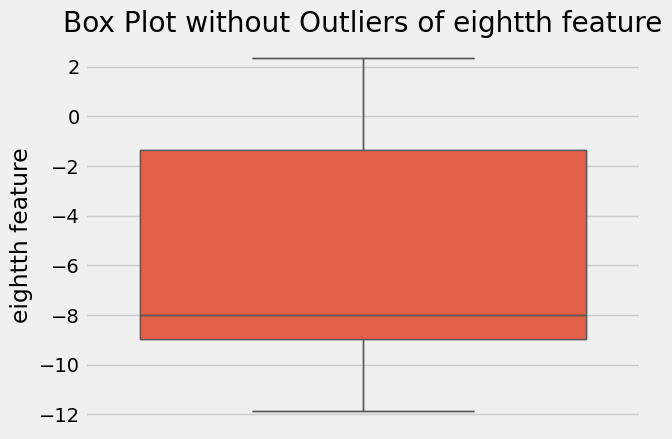

In [13]:
import seaborn as sns
#sns.boxplot(Data['Failure load(KN)'])
def removal_box_plot(Dataset, column, threshold):
    sns.boxplot(Dataset[column])
    plt.title(f'Original Box Plot of {column}')


    removed_outliers = Dataset[Dataset[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')

    return removed_outliers


threshold_value = 10
no_outliers = removal_box_plot(Dataset ,'eightth feature', threshold_value)

In [18]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Data=Scaler.fit_transform(Data)
Dataset=pd.DataFrame(Data,columns=["First feature","second feature","third feature","fourth feature","fifth feature","sixth feature","seventh feature","eightth feature"])

In [23]:
from sklearn.model_selection import train_test_split
X=Dataset.drop("eightth feature",axis=1)
y=Dataset["eightth feature"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42,shuffle=True)

In [26]:
# @title training neural network
import keras
from keras import layers
import tensorflow as tf
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import os
import random
import numpy as np
from tensorflow.keras import initializers
##Global initializer
initializer = tf.keras.initializers.GlorotUniform(seed=10)
seed_value = 10
#1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)
#2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)
#3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)


def build_model(n_hidden=4, n_neurons=50, learning_rate=   0.005, input_shape=[7],activation_1="tanh",optimizer="adam"):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activation_1,kernel_initializer=initializer))
        model.add(keras.layers.Dropout(0.05))
    model.add(keras.layers.Dense(1))
    #optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.3)
    model.compile(loss="mse", optimizer=optimizer)
    return model
model=KerasRegressor(build_model)
history=model.fit(X_train, y_train ,epochs=300,validation_data=(X_test,y_test),callbacks=[ keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)] )

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)





Epoch 1/300


<ipython-input-26-aa99d5156108>:32: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasRegressor(build_model)


36/36 [==============================] - 1s 8ms/step - loss: 0.0442 - val_loss: 0.0094
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.0092
Epoch 3/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0085
Epoch 4/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.0083
Epoch 5/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.0081
Epoch 6/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0073
Epoch 7/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.0090
Epoch 8/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.0071
Epoch 9/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0070
Epoch 10/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0072
Epoch 11/300
36/36 [=

Train: 0.006, Test: 0.006


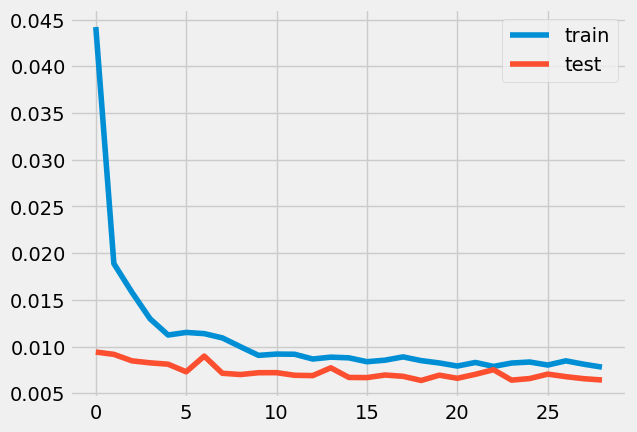

In [28]:
train_acc = model.model.evaluate(X_train, y_train, verbose=0)
test_acc = model.model.evaluate(X_test ,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [ 2, 3,4],
    "n_neurons":[10,20,30,
    "activation_1" : ["relu","tanh"],

}

#rnd_search_cv = RandomizedSearchCV(model, param_distribs, n_iter=10, cv=3, )
#rnd_search_cv.fit(Xtrain, ytrain, epochs=100)
gs=GridSearchCV(estimator=model, param_grid=param_distribs, cv=3)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train, y_train)

12/12 [==============================] - 0s 2ms/step - loss: 0.1022
Train on 765 samples
765/765 [==============================] - 0s 556us/sample - loss: 0.2541


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 764 samples
764/764 [==============================] - 0s 649us/sample - loss: 0.1016
Train on 765 samples
765/765 [==============================] - 1s 752us/sample - loss: 0.1085
Train on 765 samples
765/765 [==============================] - 1s 862us/sample - loss: 0.1011
Train on 764 samples
764/764 [==============================] - 1s 1ms/sample - loss: 0.1073
Train on 765 samples
765/765 [==============================] - 1s 1ms/sample - loss: 0.1232
Train on 765 samples
765/765 [==============================] - 1s 2ms/sample - loss: 0.0952
Train on 764 samples
764/764 [==============================] - 1s 1ms/sample - loss: 0.3136
Train on 765 samples
765/765 [==============================] - 1s 2ms/sample - loss: 0.1706
Train on 765 samples
765/765 [==============================] - 1s 2ms/sample - loss: 0.5223
Train on 764 samples
764/764 [==============================] - 4s 5ms/sample - loss: 0.2046
Train on 765 samples
765/765 [==============================] - 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/loc

Train on 1147 samples
1147/1147 [==============================] - 3s 3ms/sample - loss: 0.0601


In [39]:
print(gs.best_params_)

{'activation_1': 'tanh', 'n_hidden': 4, 'n_neurons': 40}
{'activation_1': 'tanh', 'n_hidden': 4, 'n_neurons': 40}


In [33]:
def fitness_func(solution,solution_idx):
  output=numpy.sum(solution*X)
  error=numpy.abs(output-y)
  fitness=1/(error+0.00001)
  return fitness

In [55]:
import pygad
import tensorflow
from tensorflow.keras import Sequential
model=Sequential()
model.add(tensorflow.keras.layers.Dense(10, input_shape=(8,)))
model.add(tensorflow.keras.layers.Dense(1))


In [56]:
import pygad.kerasga
keras_ga=pygad.kerasga.KerasGA(model=model,num_solutions=10)

In [76]:
def fitness_func(ga_instance,solution,solution_idx):
  global X,y,keras_ga,model
  model_weights_matrix=pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
  model.set_weights(weights=model_weights_matrix)
  predictions=model.predict(data_inputs)
  mae=tensorflow.keras.losses.MeanAbsoluteError()
  error=mae(data_outputs,predictions).numpy()
  solution_fitness/(error+0.000001)
  return solution_fitness

last_fitness=0

def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]


ga_instance=pygad.GA(num_generations=250,
                     num_parents_mating=5,
                     fitness_func=fitness_func,
                     initial_population=keras_ga.population_weights,
                     suppress_warnings=True)
#solution, solution_fitness, solution_idx = pygad.GA.best_solution(ga_instance.last_generation_fitness)

In [68]:


solution, solution_fitness, solution_idx = pygad.GA.best_solution(ga_instance.last_generation_fitness)

In PyGAD 2.20.0, the fitness function must accept 3 parameters:
1) The instance of the 'pygad.GA' class.
2) A solution to calculate its fitness value.
3) The solution's index within the population.

The passed fitness function named 'fitness_func' accepts 2 parameter(s).
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pygad/pygad.py", line 951, in __init__
    raise ValueError(f"In PyGAD 2.20.0, the fitness function must accept 3 parameters:\n1) The instance of the 'pygad.GA' class.\n2) A solution to calculate its fitness value.\n3) The solution's index within the population.\n\nThe passed fitness function named '{fitness_func.__code__.co_name}' accepts {fitness_func.__code__.co_argcount} parameter(s).")
ValueError: In PyGAD 2.20.0, the fitness function must accept 3 parameters:
1) The instance of the 'pygad.GA' class.
2) A solution to calculate its fitness value.
3) The solution's index within the population.

The passed fitness function named 'fitne

ValueError: In PyGAD 2.20.0, the fitness function must accept 3 parameters:
1) The instance of the 'pygad.GA' class.
2) A solution to calculate its fitness value.
3) The solution's index within the population.

The passed fitness function named 'fitness_func' accepts 2 parameter(s).